# King County House Price Analysis and Prediction

## Context
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. 

It's a great dataset for evaluating simple regression models.

## Problem Description

Predict the house price based on the given attributes using regression with the following approaches:
1. Multivariate
2. Polynomial
3. Polynomial with Normalization
4. SVR (Support Vector Regression)
5. Decision Tree
6. Random Forest

## Data Description

1. Id - Unique ID for each home sold
2. date - Date of the home sale
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living - Square footage of the apartments interior living space
7. sqft_lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - An index from 1 to 5 on the condition of the apartment,
12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
13. sqft_above - The square footage of the interior housing space that is above ground level
14. sqft_basement - The square footage of the interior housing space that is below ground level
15. yr_built - The year the house was initially built
16. yr_renovated - The year of the house’s last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Here, Price is our dependant variable

## Content
1. Loading Libraries and Data
2. Data Preprocessing and Visualization
3. Creating Models
4. Conclusion

## 1. Loading Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('kc_house_data.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2. Data Preprocessing and Visualization

In [3]:
raw_data.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


## Dealing with missing values

In [4]:
raw_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is no missing values

In [5]:
# I drop the 'id' column because it is meaningless for this problem and I will split the' date' column in 3 parts, 'day', 'month' and 'year'.
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['year'] = raw_data['date'].dt.year
raw_data['month'] = raw_data['date'].dt.month
raw_data['day'] = raw_data['date'].dt.day

raw_data = raw_data.drop(["id", "date"],axis=1)

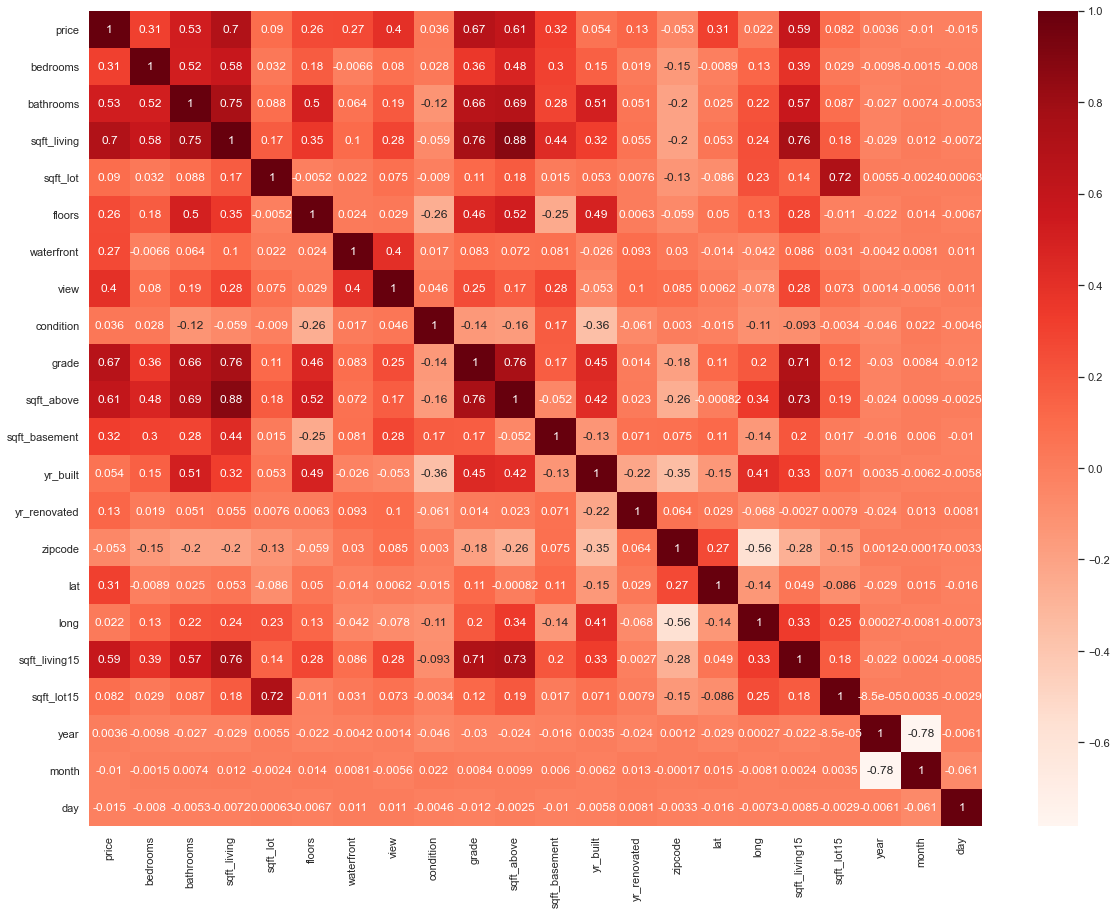

In [6]:
cor = raw_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Regarding the yr_built and yr_renovated variables, I will create a new column with the below logic,

1. yr_gap -> yr_renovated - yr_built
2. if yr_renovated is zero we can put -1

In [7]:
raw_data["yr_gap"] = raw_data["yr_renovated"] - raw_data["yr_built"]
raw_data["yr_gap"] = raw_data["yr_gap"].apply(lambda x : x if x >=0 else -1)

In [8]:
raw_data["yr_gap"].corr(raw_data["price"])

0.11840706635321967

In [9]:
raw_data = raw_data.drop(["yr_renovated", "yr_built"],axis=1)

## Exploring tghe PDFs

C:\Users\Usuario\anaconda3\envs\tf-3.7-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

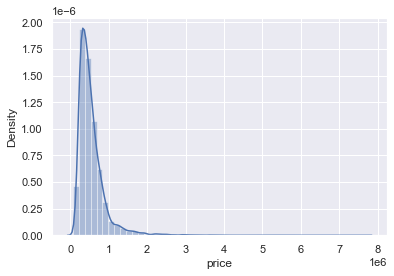

In [10]:
sns.distplot(raw_data['price'])

It looks like a Normal Distribution, but on the right there is some data (outliers) that distorts the distribution.

### Dealing with outliers

C:\Users\Usuario\anaconda3\envs\tf-3.7-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

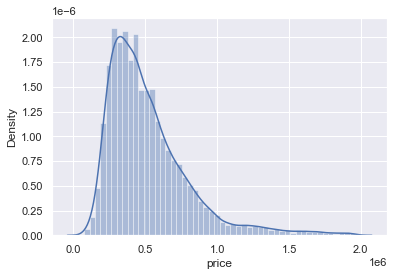

In [11]:
q1 = raw_data['price'].quantile(0.99)
data_1 = raw_data[raw_data['price']<q1]

sns.distplot(data_1['price'])

In [12]:
data_cleaned = data_1.reset_index(drop=True)

## Checking the OLS assumptions

In [13]:
data_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_gap
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,-1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,98125,47.7210,-122.319,1690,7639,2014,12,9,40
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,-1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,98136,47.5208,-122.393,1360,5000,2014,12,9,-1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,-1


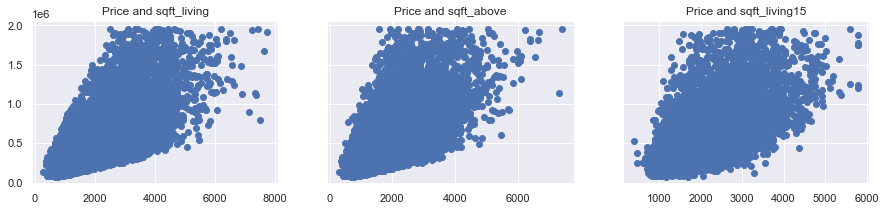

In [14]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['sqft_living'],data_cleaned['price'])
ax1.set_title('Price and sqft_living')
ax2.scatter(data_cleaned['sqft_above'],data_cleaned['price'])
ax2.set_title('Price and sqft_above')
ax3.scatter(data_cleaned['sqft_living15'],data_cleaned['price'])
ax3.set_title('Price and sqft_living15')

plt.show()

In [15]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_gap,log_price
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,13,-1,12.309982
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,9,40,13.195614
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,25,-1,12.100712
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,9,-1,13.311329
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,18,-1,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21391,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,98103,47.6993,-122.346,1530,1509,2014,5,21,-1,12.793859
21392,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,98146,47.5107,-122.362,1830,7200,2015,2,23,-1,12.899220
21393,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,98144,47.5944,-122.299,1020,2007,2014,6,23,-1,12.904459
21394,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,98027,47.5345,-122.069,1410,1287,2015,1,16,-1,12.899220


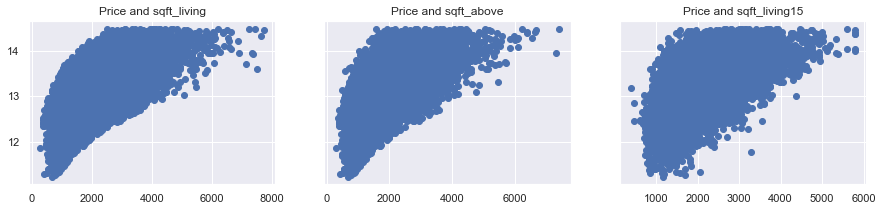

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['sqft_living'],log_price)
ax1.set_title('Price and sqft_living')
ax2.scatter(data_cleaned['sqft_above'],log_price)
ax2.set_title('Price and sqft_above')
ax3.scatter(data_cleaned['sqft_living15'],log_price)
ax3.set_title('Price and sqft_living15')

plt.show()

The relationships show something like a linear relationship

There is not dummy variables

## Creating Models

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [18]:
data_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,yr_gap,log_price
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,2014,10,13,-1,12.309982
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,2014,12,9,40,13.195614
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2015,2,25,-1,12.100712
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,2014,12,9,-1,13.311329
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2015,2,18,-1,13.142166


### Declare the inputs and the targets

In [19]:
# Creating X and Y (features and labels)
x = data_cleaned.iloc[:,1:-1]
y = data_cleaned.iloc[:,-1:]
X = x.values
Y_log = y.values

### Scale the data

In [20]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y_log, test_size=0.2, random_state=365)

### Checking the significance of the variables

In [22]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

array([10.88578375, -0.20787758,  0.12571524,  0.6139759 ,  0.90042439,
        0.10741142,  0.37136213,  0.26113792,  0.39961622,  1.6132354 ,
        0.50618191,  0.29414223, -0.08061817,  0.92438176, -0.33474709,
        0.57460986, -0.2097268 ,  0.06046773,  0.0222778 , -0.01708825,
        0.36651119])

In [23]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2498.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:23:23   Log-Likelihood:                -1013.3
No. Observations:               17116   AIC:                             2067.
Df Residuals:                   17096   BIC:                             2221.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8858      0.023    467.762      0.0

All the variables have a great p_value.

### Multivariate Regression

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train, y_train)

0.7352137071093283

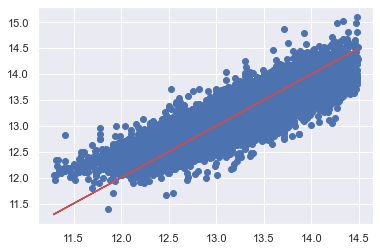

In [25]:
#Linear - Regression Graph
predictArray_lin = lr.predict(X_train)
plt.scatter(y_train,predictArray_lin, color="b")
plt.plot(y_train,y_train, color="r")

### Polynomial Regression

In [26]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_train)
lin_reg2.score(X_poly,y_train)

0.8751638801944406

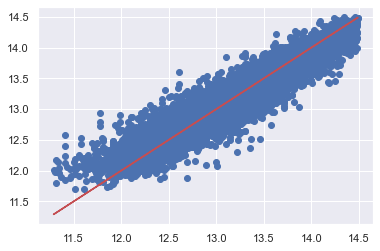

In [27]:
# Polynomial - Regression Graph
predictArray_poly = lin_reg2.predict(X_poly) 
plt.scatter(y_train,predictArray_poly, color="b")
plt.plot(y_train,y_train, color="r")

### SVR

In [69]:
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
X_scaled = sc1.fit_transform(X_train)

sc2=StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(y_train.reshape(-1,1)))

In [70]:
from sklearn.svm import SVR
svr_reg2 = SVR(kernel='rbf')
svr_reg2.fit(X_scaled,y_scaled)
svr_reg2.score(X_scaled,y_scaled)

0.876274728741853

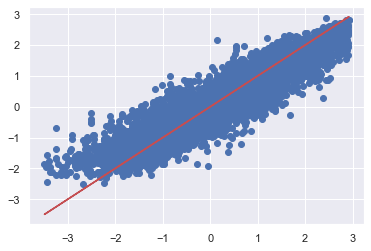

In [71]:
#SVR - Regression Graph
predictArray_svr = svr_reg2.predict(X_scaled)
plt.scatter(y_scaled,predictArray_svr, color="b")
plt.plot(y_scaled,y_scaled, color="r") 

### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X_train, y_train)
r_dt.score(X_train, y_train)

1.0

However, decision tree usually "overfit" the data (in the sense that every point is assigned to a specific class) if you don't provide them early stopping criterion when you grow the tree. Nevertheless, you can use out-of-bags estimate to get a pseudo R squared.

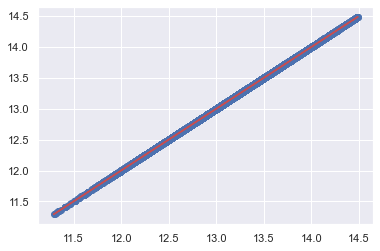

In [73]:
#Decision Tree - Regression Graph
predictArray_dt = r_dt.predict(X_train)
plt.scatter(y_train,predictArray_dt, color="b")
plt.plot(y_train,y_train, color="r")

### Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X_train, y_train.ravel())
rf_reg.score(X_train, y_train)

0.9760814041950441

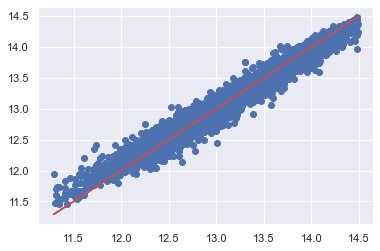

In [77]:
#Random Forest - Regression Graph
predictArray_dt = rf_reg.predict(X_train)
plt.scatter(y_train,predictArray_dt, color="b")
plt.plot(y_train,y_train, color="r")

## Testing

In [78]:
X_test_poly = poly_reg.fit_transform(X_test)
y_hat_test_poly = lin_reg2.predict(X_test_poly)

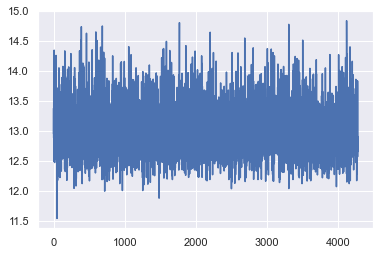

In [81]:
plt.plot(y_hat_test)
plt.show()

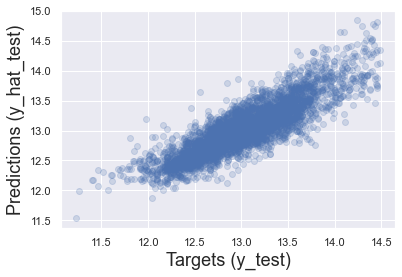

In [82]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [83]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf_poly = pd.DataFrame(np.exp(y_hat_test_poly), columns=['Prediction'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf_poly.head()

C:\Users\Usuario\anaconda3\envs\tf-3.7-gpu\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


,Prediction
0,460812.78
1,685829.36
2,336995.39
3,1143378.74
4,788512.34


In [84]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf_poly['Target'] = np.exp(y_test)
df_pf_poly

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,460812.78,379900.00
1,685829.36,690000.00
2,336995.39,325000.00
3,1143378.74,1445000.00
4,788512.34,830000.00
...,...,...
4275,1076508.55,1520000.00
4276,305364.94,275000.00
4277,277508.16,365000.00
4278,436531.32,428000.00


In [85]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf_poly['Residual'] = df_pf_poly['Target'] - df_pf_poly['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [86]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf_poly['Difference%'] = np.absolute(df_pf_poly['Residual']/df_pf_poly['Target']*100)
df_pf_poly

,Prediction,Target,Residual,Difference%
0,460812.78,379900.00,-80912.78,21.30
1,685829.36,690000.00,4170.64,0.60
2,336995.39,325000.00,-11995.39,3.69
3,1143378.74,1445000.00,301621.26,20.87
4,788512.34,830000.00,41487.66,5.00
...,...,...,...,...
4275,1076508.55,1520000.00,443491.45,29.18
4276,305364.94,275000.00,-30364.94,11.04
4277,277508.16,365000.00,87491.84,23.97
4278,436531.32,428000.00,-8531.32,1.99


In [87]:
# Exploring the descriptives here gives us additional insights
df_pf_poly.describe()

,Prediction,Target,Residual,Difference%
count,4280.00,4280.00,4280.00,4280.00
mean,inf,516728.21,-inf,inf
std,NaN,286084.09,NaN,NaN
min,0.00,75000.00,-inf,0.00
25%,326879.20,320000.00,-44925.22,4.93
50%,446229.76,450000.00,1959.89,10.74
75%,613044.67,631562.50,47733.34,19.88
max,inf,1960000.00,1800000.00,inf


In [88]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Finally, we sort by difference in % and manually check the model
df_pf_poly.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1215,399986.08,400000.00,13.92,0.00
2045,624971.53,625000.00,28.47,0.00
3842,800124.75,800000.00,-124.75,0.02
3525,549906.67,550000.00,93.33,0.02
1817,545132.70,545000.00,-132.70,0.02
...,...,...,...,...
2963,inf,625000.00,-inf,inf
686,inf,1612500.00,-inf,inf
391,inf,1850000.00,-inf,inf
1472,inf,949950.00,-inf,inf


There are clearly some errors with the y_hat_test_poly prediction array. However, the testing with Multivariable Regression doesn't have this issue

### Testing with Multivariable Regression

In [66]:
y_hat_test = lr.predict(X_test)

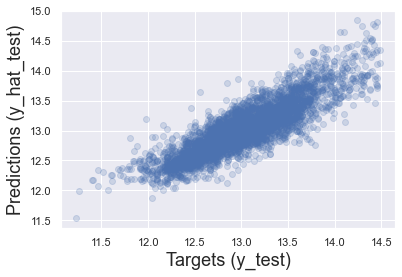

In [67]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [68]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.head()

,Prediction
0,420449.47
1,644898.55
2,393188.49
3,1056320.57
4,741109.41


In [69]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,420449.47,379900.00
1,644898.55,690000.00
2,393188.49,325000.00
3,1056320.57,1445000.00
4,741109.41,830000.00
...,...,...
4275,900041.01,1520000.00
4276,354229.57,275000.00
4277,312405.33,365000.00
4278,400103.87,428000.00


In [70]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [71]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,420449.47,379900.00,-40549.47,10.67
1,644898.55,690000.00,45101.45,6.54
2,393188.49,325000.00,-68188.49,20.98
3,1056320.57,1445000.00,388679.43,26.90
4,741109.41,830000.00,88890.59,10.71
...,...,...,...,...
4275,900041.01,1520000.00,619958.99,40.79
4276,354229.57,275000.00,-79229.57,28.81
4277,312405.33,365000.00,52594.67,14.41
4278,400103.87,428000.00,27896.13,6.52


In [72]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4280.00,4280.00,4280.00,4280.00
mean,503166.46,516728.21,13561.74,20.14
std,261068.84,286084.09,158923.92,18.03
min,102289.63,75000.00,-1258187.98,0.00
25%,338583.70,320000.00,-63035.21,7.53
50%,441927.64,450000.00,512.71,15.92
75%,585294.88,631562.50,78198.35,27.52
max,2783187.98,1960000.00,1144778.86,237.39


In [73]:
y_test

array([[12.84766334],
       [13.44444688],
       [12.69158046],
       ...,
       [12.80765263],
       [12.96687847],
       [12.53896706]])

In [74]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1515,435987.48,436000.00,12.52,0.00
2528,583101.44,583000.00,-101.44,0.02
4184,251135.72,251200.00,64.28,0.03
2752,370207.49,370000.00,-207.49,0.06
310,499716.97,500000.00,283.03,0.06
...,...,...,...,...
1050,484842.10,190000.00,-294842.10,155.18
1092,971762.06,380000.00,-591762.06,155.73
1540,392866.70,134000.00,-258866.70,193.18
68,845631.25,285000.00,-560631.25,196.71
